Q24: How clear is it that students' feedback on the course is acted on?
Q25: How well does the students' union (association or guild) represent students' academic interests?
Q14: How often does feedback help you to improve your work?
Q17: How well organised is your course?
Q10: How clear were the marking criteria used to assess your work? 
Q18: How well were any changes to teaching on your course communicated?
Q08: To what extent does your course have the right balance of directed and independent study?
Q23: To what extent are students' opinions about the course valued by staff?
Q26: How well communicated was information about your university/college's mental wellbeing support services?
Q28: Overall, I am satisfied with the quality of the course.
Q13: How often have you received assessment feedback on time?
Q02: How often do teaching staff make the subject engaging?
Q11: How fair has the marking and assessment been on your course? 
Q12: How well have assessments allowed you to demonstr

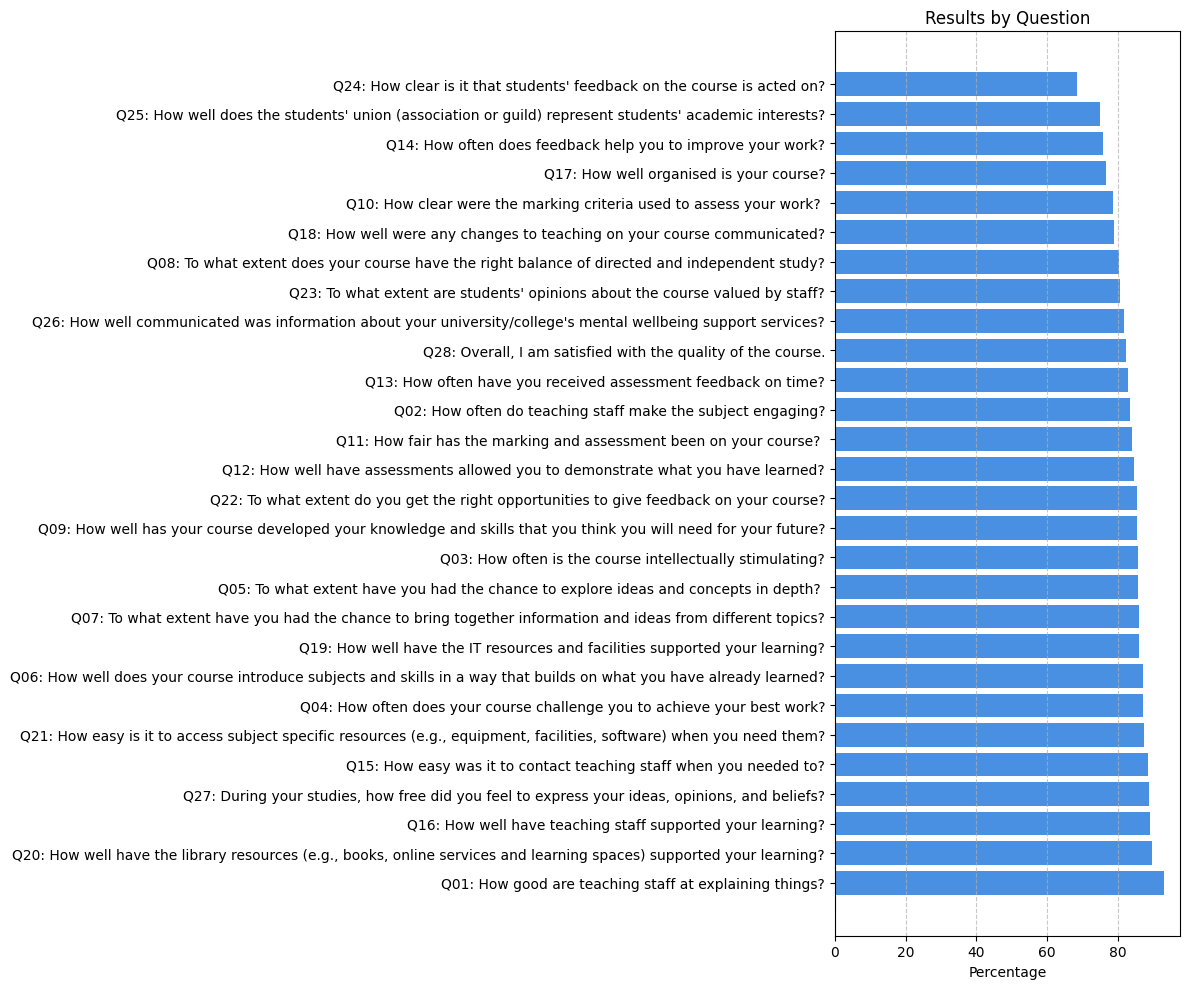

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('agree_pct', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()




plt.show()

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---
questionToPlot = [] 

answerVaules = []
# Get the list of subjects
totalCha1 = df["cah1_subject"].unique().tolist()

top_10 = (df.groupby('question', as_index=False)
            .agg(mean_agree_pct=('benchmark', 'mean'))
            .sort_values('mean_agree_pct', ascending=True)
)

    # 3. APPEND to the list
for index, row in top_10.iterrows():
    
                    # The subject name
     
        questionToPlot.append(row['question'])              
        answerVaules.append(row['mean_agree_pct'])   



for x in range(len(top_10)):
    print(questionToPlot[x]) 
# -----------------------------

# --- THE PLOTTING CODE (FIXED) ---



fig, ax = plt.subplots(figsize=(12, 10))

# Use barh for horizontal bars
ax.barh(questionToPlot, answerVaules, color='#4a90e2')

ax.set_xlabel("Percentage")
ax.set_title("Results by Question")
ax.grid(axis='x', linestyle='--', alpha=0.7) # Grid on X axis only
ax.invert_yaxis() # Top question at the top

plt.tight_layout()
plt.show()






ModuleNotFoundError: No module named 'matplotlib'

In [3]:
Q03: How often is the course intellectually stimulating?




Object `stimulating` not found.


In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("nss2025.csv")
# --- YOUR CODE (UNCHANGED) ---

total_pop = df['population'].sum()
total_res = df['respondents'].sum()


print((total_res/total_pop)*100)


72.8150541908839


# Populations

4418


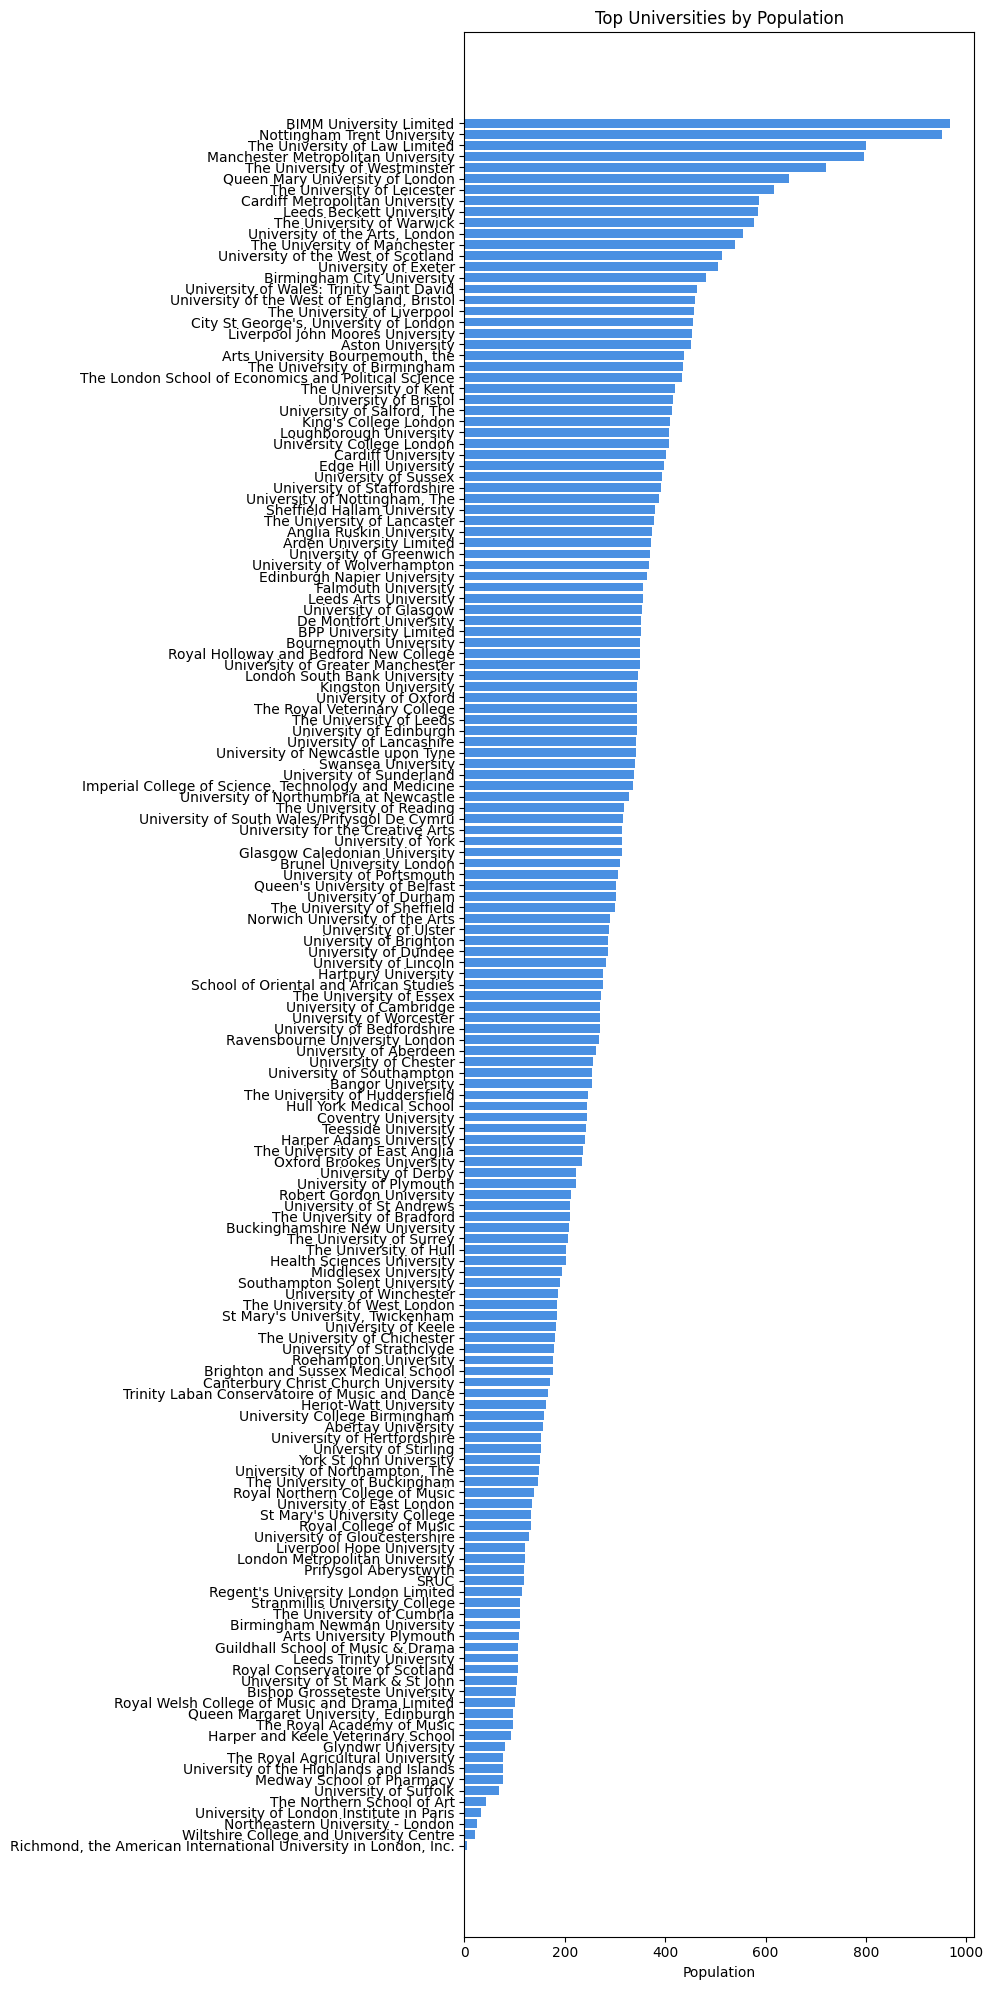

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("onlyUni.csv")

questionToPlot = [] 
answerValues = []

# --- DATA PROCESSING ---

# 1. Select only the columns we need
subset = df[['provider', 'population']]

# 2. Remove duplicates to make it UNIQUE
# This keeps 1 row per provider with their population
unique_df = subset.drop_duplicates()

# 3. Sort by population and take top 10
top_10 = unique_df.sort_values('population', ascending=False).iloc[2:]


# --- LOOP (UNCHANGED) ---
for index, row in top_10.iterrows():
    questionToPlot.append(row['provider'])     
    answerValues.append(row['population'])   

print(len(top_10)) # Should be 10

# --- PLOTTING ---
fig, ax = plt.subplots(figsize=(10, 20))
ax.barh(questionToPlot, answerValues, color='#4a90e2')
plt.title("Top Universities by Population")
ax.set_xlabel("Population")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

#This exlcuudes the 2 ones as they are online school hence more students as there is ,ess people which is needed 

521


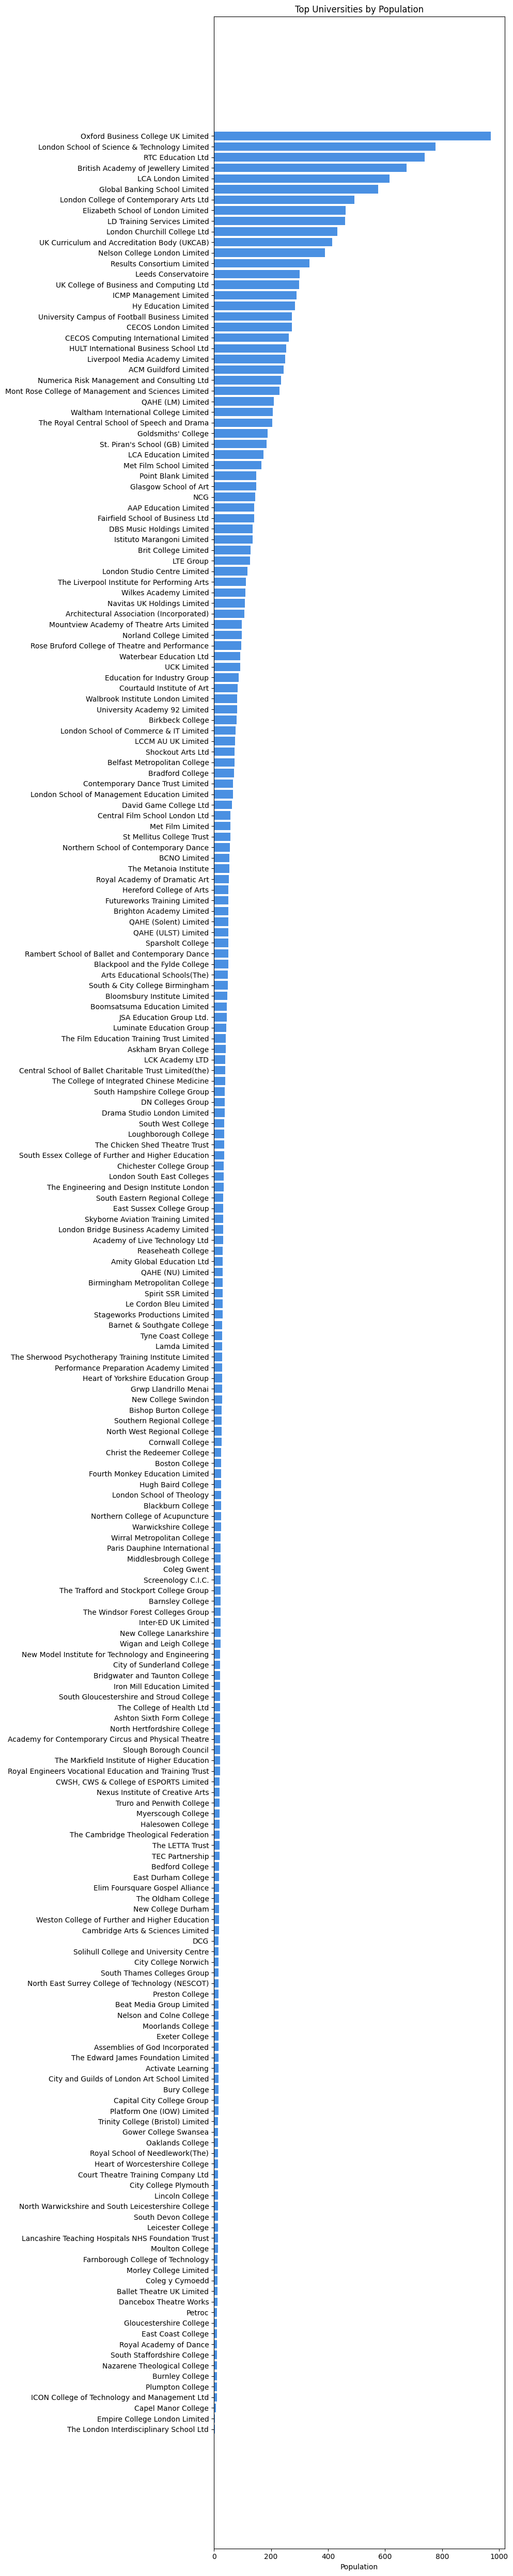

In [3]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("FEHE.csv")

questionToPlot = [] 
answerValues = []

# --- DATA PROCESSING ---

# 1. Select only the columns we need
subset = df[['provider', 'population']]

# 2. Remove duplicates to make it UNIQUE
# This keeps 1 row per provider with their population
unique_df = subset.drop_duplicates()

# 3. Sort by population and take top 10
top_10 = unique_df.sort_values('population', ascending=False).iloc[2:]


# --- LOOP (UNCHANGED) ---
for index, row in top_10.iterrows():
    questionToPlot.append(row['provider'])     
    answerValues.append(row['population'])   

print(len(top_10)) # Should be 10

# --- PLOTTING ---
fig, ax = plt.subplots(figsize=(10, 50))
ax.barh(questionToPlot, answerValues, color='#4a90e2')
plt.title("Top Universities by Population")
ax.set_xlabel("Population")
ax.invert_yaxis()
plt.tight_layout()
plt.show()

#This exlcuudes the 2 ones as they are online school hence more students as there is ,ess people which is needed 





# Each providers and the for piplaution and respondence

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("nss2025.csv")

# ---- Aggregate by CAH3 subject ----
cah3_summary = (
    df
    .groupby("cah3_subject", as_index=False)
    .agg(
        mean_agree_pct=("benchmark", "mean"),
        population=("population", "sum"),
        responses=("respondents", "sum")
    )
)

# ---- Scatter plot ----
plt.figure(figsize=(10, 6))

plt.scatter(
    cah3_summary["responses"],      # X axis
    cah3_summary["population"],     # Y axis
    s=cah3_summary["mean_agree_pct"],
    alpha=0.7
)

plt.xlabel("Responses")
plt.ylabel("Population")
plt.title("CAH3 Subjects: Responses vs Population")

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (28023842.py, line 23)